### 岭回归和Lasso算法的Python实现
主要包含岭回归（Ridge regression）和Lasso两种方法，二者的主要原理是将系数往等于0的方向压缩。

可参考《统计学习导论-基于R应用》第6章<br><br>

- #### 岭回归
最小化公式：
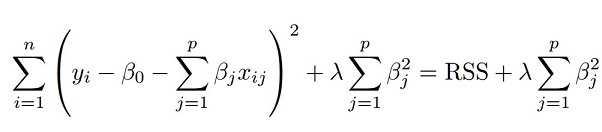
目标函数：
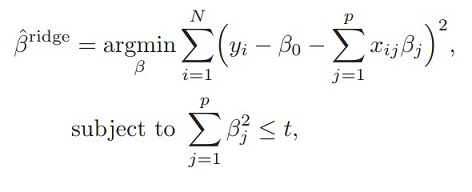
对自变量进行标准化：
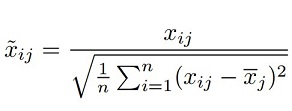

- #### Lasso：Least absolute shrinkage and selection operator
最小化公式：
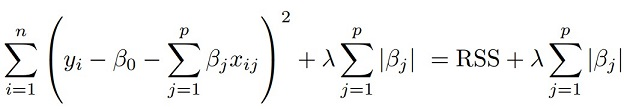
目标函数：
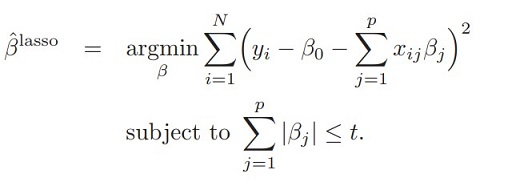
<br>
其中，$\lambda$ 是调节参数，有时称为超参数。$\lambda$
$\displaystyle \sum^{p}_{j = 1}{\beta^2_j}$ 与$\lambda$$\displaystyle \sum^{p}_{j = 1}{|\beta_j|}$ 为压缩惩罚，$p$表示自变量个数。

- #### 变量选择特征
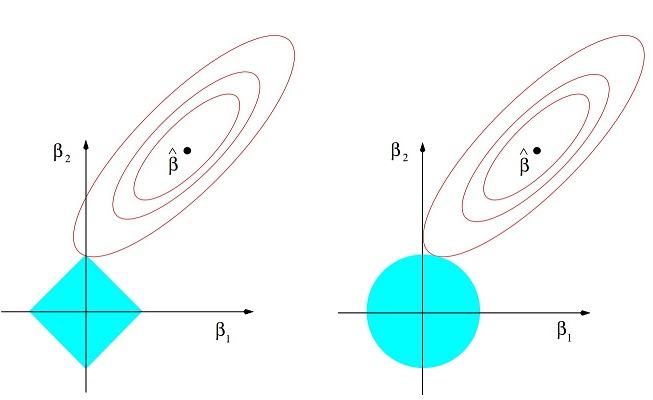

- #### 示例1：岭回归
使用信用卡数据进行岭回归。<br>
信用卡数据字段：<br>
Income：收入，Limit：信用额度，Rating：信用等级，Cards：信用卡数，	Age：年龄，	Education：教育程度 ，Gender：性别，Student：是否学生，Married：是否已婚，Ethnicity：种族，Balance：余额

In [1]:
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
data = pd.read_csv(r'e:\data\credit.csv',index_col=0)
print('数据形状：',data.shape)
print('\n数据示例：')
data.head(10)

数据形状： (400, 11)

数据示例：


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [2]:
'''
使用Income,Limit,Rating,Student四个属性作为自变量，使用Balance做因变量
构建模型，即通过收入，信用额度，信用等级和是否学生来预测余额。
对于超参数lambda，设定从10^(-2)到10^10次方超参数集等距挑选100个数进行测试。
'''
X = data[['Income','Limit','Rating','Student']]
y = data['Balance']
###将因子变量映射成0,1
X['Student'] = X['Student'].map({'Yes':1,'No':0})
###对数字变量进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
formula = 'y~X'
model=smf.ols(formula,data={'y':y,'X':X_scaled})
result=model.fit()
result.summary()


f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1967.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          3.06e-259
Time:                        08:14:20   Log-Likelihood:                -2411.3
No. Observations:                 400   AIC:                             4833.
Df Residuals:                     395   BIC:                             4852.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    520.0150      5.052    102.934      0.000     510.083     529.947
X[0]        -279.6526      8.288    -33.742      0.000    -295.947    -263.359
X[1]         280.5161     64.231      4.367      0.000     154.239     406.793
X[2]         338.4898     64.121      5.279      0.000     212.430     464.550
X[3]         126.8005      5.062     25.049      0.000     116.848     136.753
==============================================================================
Omnibus:                       24.527   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.945
Skew:                           0.647   Prob(JB):                     8.55e-07
Kurtosis:                       2.963   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


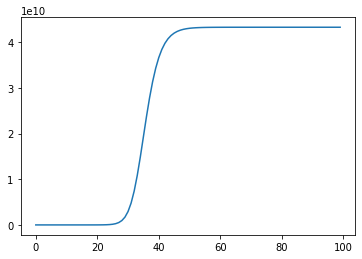

(4.326563071665612, 1e-05)

In [3]:
mse = []###残差均方
###超参数的范围，100个，从10^-2到10^10
lam=10**np.linspace(-5,10,100)
###Statsmodels有一个岭回归和Lasso的简单实现即fit_regularized函数
for l in lam:
    ###L1_wt:0为岭回归；1为Lasso；0-1之间为ElasticNet算法
    result = model.fit_regularized(L1_wt=0,alpha=l,refit=True,profile_scale=False)
    ###使用原始数据进行预测
    pred=result.predict()
    ###计算残差均方
    mse.append(np.sum(y-pred)**2)
    
sns.lineplot(np.arange(0,len(mse)),mse)
plt.show()
lammin=lam[np.argmin(mse)]
###最小均方残差以及lambda超参数的值
np.min(mse),lammin

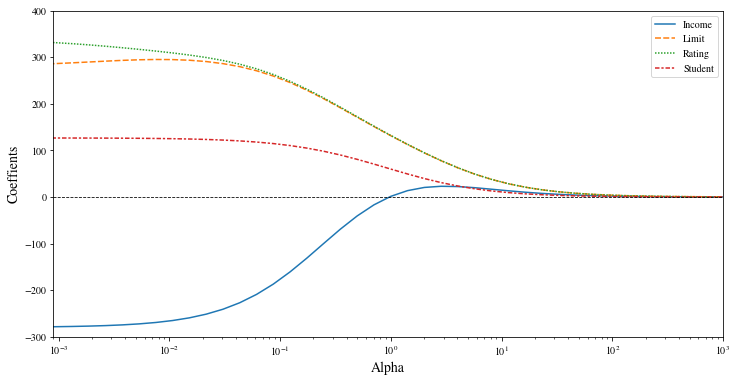

In [4]:
'''
岭回归随着lambda->Inf，压缩惩罚项影响力增加，岭回归系数估计值越接近0.
见下图。
'''
##超参数lambda，有的教材也用alpha

# 设置matplotlib参数，正确显示中文和'-'符号。
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
alpha=10**np.linspace(-5,10,100)
intercept_dict = {}
for a in alpha:
    result = model.fit_regularized(L1_wt=0,alpha=a,refit=True,profile_scale=True)
    ###保存每次迭代的回归系数估计值
    intercept_dict[a]=result.params
###lambda参数与对应的系数估计值，去掉截距项
params_l2 = pd.DataFrame(intercept_dict).T
params_l2=params_l2[[1,2,3,4]]
###行索引是alpha值，列索引是自变量名
params_l2.columns=['Income','Limit','Rating','Student']
plt.figure(figsize = (12,6))

###Seaborn使用行索引为X轴，每一列的数据为Y轴，绘制曲线
#列名作为示意图的标记。
sns.lineplot(data = params_l2,dashes=True)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.8,color = 'black')
plt.xticks(alpha)
###对X轴进行对数转换伸缩。
plt.xscale('log')
plt.ylim(-300,400)
plt.xlim(10**(-3)-0.0001,10**3)
plt.ylabel('Coeffients',size=14)
plt.xlabel('Alpha',size=14)
plt.show()

In [5]:
###不同lambda值下的回归系数，
#很显然，随着lambda值不断变大，系数向零缩减，非常接近于零。
params_l2

,Income,Limit,Rating,Student
1.000000e-05,-2.796386e+02,2.805992e+02,3.383925e+02,1.267993e+02
1.417474e-05,-2.796328e+02,2.806337e+02,3.383521e+02,1.267988e+02
2.009233e-05,-2.796245e+02,2.806825e+02,3.382949e+02,1.267980e+02
2.848036e-05,-2.796127e+02,2.807513e+02,3.382142e+02,1.267970e+02
4.037017e-05,-2.795961e+02,2.808481e+02,3.381004e+02,1.267955e+02
...,...,...,...,...
2.477076e+09,8.594953e-08,1.597357e-07,1.600930e-07,4.801494e-08
3.511192e+09,6.063569e-08,1.126904e-07,1.129425e-07,3.387359e-08
4.977024e+09,4.277728e-08,7.950082e-08,7.967869e-08,2.389715e-08
7.054802e+09,3.017853e-08,5.608626e-08,5.621174e-08,1.685897e-08


- #### 示例2：Lasso

相对于岭回归不做自变量的选择，lasso可以选择自变量，将不重要自变量的系数压缩至0。

因此称lasso模型为稀疏模型

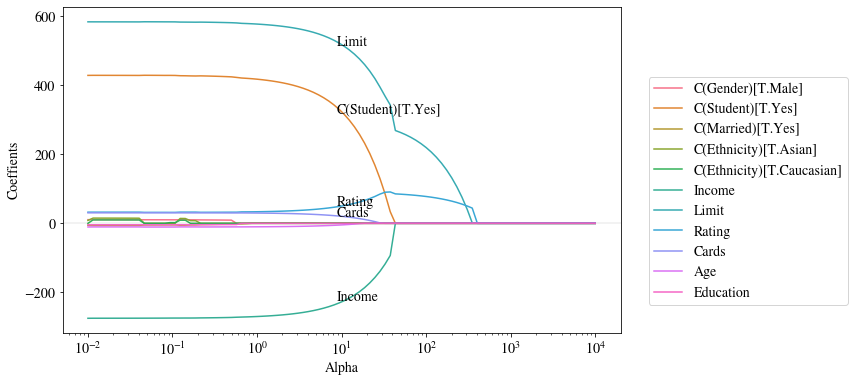

In [6]:
'''
Lasso变量选择，某些自变量系数估计值压缩为零。
首先构建包含所有自变量的的模型，注意要对属性类型进行因子化，即转换成哑变量。
'''
X = data
scaler = StandardScaler()
X[['Income','Limit','Rating','Cards','Age','Education']]=scaler.fit_transform(
    X[['Income','Limit','Rating','Cards','Age','Education']])
X['Balance']=data['Balance']

###模型包含了所有自变量，对于因子变量通过patsy的C函数转换成category类别变量
formula = 'Balance~Income+Limit+Rating+Cards+Age+Education+C(Gender)\
               +C(Student)+C(Married)+C(Ethnicity)'
model=smf.ols(formula,data=X)
result_ols=model.fit()
alpha=10**np.linspace(-2,4,100)
###系数的绝对值之和
betaols_l1=np.sum(np.abs(result_ols.params))
params_l1 = {}

params2_l1 = {}
for a in alpha:
    result = model.fit_regularized(L1_wt=1,alpha=a)
    params=result.params
    params_l1[a]=params
    rate=np.sum(np.abs(params))/betaols_l1
    ###保存每个alpha参数回归之后的系数与未正则化模型的系数
    #的l1范数之比作为字典的键，以系数作作为值
    #用于下个代码单元绘制正则化路径图。
    params2_l1[rate] = params
    
###lambda参数与对应的系数估计值，去掉截距项
params_l1 = pd.DataFrame(params_l1).T
params2_l1 = pd.DataFrame(params2_l1).T
del params_l1['Intercept']
del params2_l1['Intercept']
plt.figure(figsize = (10,6))
sns.lineplot(data = params_l1,dashes=False)
plt.axhline(y = 0,lw = 0.1,color = 'black')
plt.xticks(alpha,fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.ylabel('Coeffients',size=14)
plt.xlabel('Alpha',size=14)
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=2,fontsize=14)

###在曲线上标注系数名(只标注值大于10的系数)
pnames=params_l1.iloc[50].iloc[np.where(np.abs(params_l1.iloc[50])>10)]
xn=pnames.name
for p in pnames.index:
    yn=pnames.loc[p]
    plt.text(xn-2,yn,p,fontsize=14)
plt.show()

In [7]:
pnames.index,pnames.name,pnames

(Index(['C(Student)[T.Yes]', 'Income', 'Limit', 'Rating', 'Cards'], dtype='object'),
 10.722672220103231,
 C(Student)[T.Yes]    315.840489
 Income              -224.199504
 Limit                513.030478
 Rating                51.418883
 Cards                 19.552916
 Name: 10.722672220103231, dtype: float64)

In [8]:
params_l1

,C(Gender)[T.Male],C(Student)[T.Yes],C(Married)[T.Yes],C(Ethnicity)[T.Asian],C(Ethnicity)[T.Caucasian],Income,Limit,Rating,Cards,Age,Education
0.010000,10.563768,428.526534,-5.653529,8.435623,0.000000,-275.084080,583.675173,32.274219,30.404194,-10.544515,-4.268603
0.011498,10.605433,428.690293,-6.280641,15.093877,9.870837,-274.944679,583.625610,32.322465,30.412895,-10.411943,-4.151370
0.013219,10.600946,428.673285,-6.268550,15.078504,9.859365,-274.936638,583.615496,32.323988,30.411364,-10.410843,-4.149627
0.015199,10.595786,428.653730,-6.254647,15.060829,9.846176,-274.927392,583.603867,32.325740,30.409604,-10.409578,-4.147623
0.017475,10.589855,428.631247,-6.238663,15.040507,9.831011,-274.916762,583.590496,32.327755,30.407580,-10.408124,-4.145319
...,...,...,...,...,...,...,...,...,...,...,...
5722.367659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6579.332247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7564.633276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8697.490026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


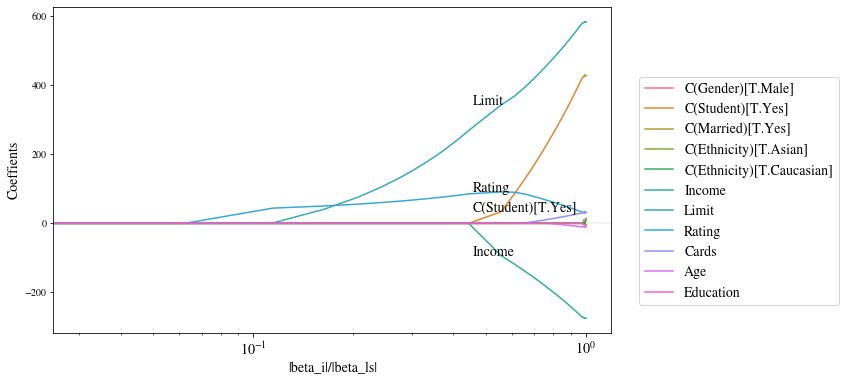

In [9]:
'''
下图可以看出变量进入模型的先后顺序-即所谓“正则化路径（regularization path）”
先后进入模型的变量依次是：Rating,Limit、Student和Income
'''
plt.figure(figsize = (10,6))
sns.lineplot(data = params2_l1,dashes=False)
plt.axhline(y = 0,lw = 0.1,color = 'black')
plt.xticks(alpha)
plt.xscale('log')
plt.ylabel('Coeffients',fontsize=14)
plt.xlabel('|beta_i|/|beta_ls|',fontsize=14)
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=2,fontsize=14)

###在曲线上标注系数名(注：此处只标注值绝对值大于5的系数)，在第59个数据处进行标注
pnames=params2_l1.iloc[59].iloc[np.where(np.abs(params2_l1.iloc[59])>5)]
xn=pnames.name##lambda的值
for p in pnames.index:
    yn=pnames.loc[p]
    plt.text(xn-0.1,yn,p,fontsize=14)
plt.xticks(size=14)
plt.show()

- #### 正则化与变量选择

In [10]:
### 岭回归的模型正则化
#alpha=1000时，系数被缩减到0附近
result_test1 = model.fit_regularized(L1_wt=0,alpha=1000)
result_l2=result_test1.params
result_l2

array([ 0.51901361,  0.24543935,  0.08758112,  0.31653363,  0.13040066,
        0.25740861,  0.21206243,  0.39471856,  0.39560115,  0.03963808,
        0.00073846, -0.00367584])

In [11]:
### Lasso的变量选择
#设置alpha=4，很多系数被缩减为0
result_test = model.fit_regularized(L1_wt=1,alpha=20)
result_l1=result_test.params
result_l1

Intercept                    478.148450
C(Gender)[T.Male]              0.000000
C(Student)[T.Yes]            218.643566
C(Married)[T.Yes]              0.000000
C(Ethnicity)[T.Asian]          0.000000
C(Ethnicity)[T.Caucasian]      0.000000
Income                      -180.170159
Limit                        451.360756
Rating                        68.799025
Cards                          9.842547
Age                            0.000000
Education                      0.000000
dtype: float64

- #### 最优$\lambda$参数选择
选择fit_regularized函数参数$\alpha$的最优值

In [12]:
X1=data.copy()
dummies1 = pd.get_dummies(X1.Student, prefix='Student')
dummies2 = pd.get_dummies(X1.Gender, prefix='Gender')
dummies3 = pd.get_dummies(X1.Married, prefix='Married')
dummies4 = pd.get_dummies(X1.Ethnicity, prefix='Ethnicity')
X1=X1.drop('Student',axis=1).join(dummies1)
X1=X1.drop('Gender',axis=1).join(dummies2)
X1=X1.drop('Married',axis=1).join(dummies3)
X1=X1.drop('Ethnicity',axis=1).join(dummies4)
X1=X1.drop('Student_No',axis=1)
X1=X1.drop('Gender_Female',axis=1)
X1=X1.drop('Married_No',axis=1)
X1=X1.drop('Ethnicity_African American',axis=1)
scaler = StandardScaler()
X1[['Income','Limit','Rating','Cards','Age','Education','Balance']]=scaler.fit_transform( \
    X1[['Income','Limit','Rating','Cards','Age','Education','Balance']])
#X1['Balance']=data['Balance']
dummies1,X1.head()

(     Student_No  Student_Yes
 1             1            0
 2             0            1
 3             1            0
 4             1            0
 5             1            0
 ..          ...          ...
 396           1            0
 397           1            0
 398           1            0
 399           1            0
 400           1            0
 
 [400 rows x 2 columns],
      Income     Limit    Rating     Cards       Age  Education   Balance  \
 1 -0.861583 -0.489999 -0.465539 -0.699130 -1.257674  -0.784930 -0.407277   
 2  1.727437  0.828261  0.828703  0.031032  1.528451   0.496588  0.834056   
 3  1.686756  1.014787  1.029311  0.761194  0.889964  -0.784930  0.130634   
 4  2.946152  2.068440  2.110003  0.031032 -1.141586  -0.784930  0.966900   
 5  0.302928  0.070012  0.013331 -0.699130  0.715831   0.816968 -0.411633   
 
    Student_Yes  Gender_Male  Married_Yes  Ethnicity_Asian  Ethnicity_Caucasian  
 1            0            1            1                0         

In [13]:
'''
岭回归最优lambda参数选择
'''
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Ridge,RidgeCV,LassoLarsIC
from sklearn.metrics import mean_squared_error

#拆分为训练集和测试集
predictors=['Income','Limit','Rating','Cards','Age','Education',
            'Student_Yes','Gender_Male','Married_Yes',
            'Ethnicity_Asian','Ethnicity_Caucasian']
            
x_train,x_test,y_train,y_test=model_selection.train_test_split(X1[predictors],
                                                               X1.Balance,test_size=0.2,
                                                               random_state=1234)

#构造不同的lambda值
Lambdas=np.logspace(-10,10,200)
#设置交叉验证的参数，使用均方误差评估
ridge_cv=RidgeCV(alphas=Lambdas,normalize=True,scoring='neg_mean_squared_error',cv=10)
ridge_cv.fit(x_train,y_train)

#基于最佳lambda值建模
ridge=Ridge(alpha=ridge_cv.alpha_,normalize=True)
ridge.fit(x_train,y_train)
#打印回归系数
print(pd.Series(index=['Intercept']+x_train.columns.tolist(),
                data=[ridge.intercept_]+ridge.coef_.tolist()))

#模型评估
ridge_pred=ridge.predict(x_test)
#均方误差
MSE=mean_squared_error(y_test,ridge_pred)
print('MSE:',MSE,'\naplha:',ridge_cv.alpha_)


Intercept             -0.108993
Income                -0.585111
Limit                  1.088484
Rating                 0.238970
Cards                  0.058086
Age                   -0.022707
Education             -0.002364
Student_Yes            0.926261
Gender_Male            0.030776
Married_Yes           -0.036078
Ethnicity_Asian        0.026058
Ethnicity_Caucasian    0.032685
dtype: float64
MSE: 0.040116497819261986 
aplha: 0.0003409285069746815


In [14]:
'''
Lasso的Lambda最优值选择。
使用sklearn相关函数，比如LassoCV等。
'''
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error

predictors=['Income','Limit','Rating','Cards','Age','Education',
            'Student_Yes','Gender_Male','Married_Yes',
            'Ethnicity_Asian','Ethnicity_Caucasian']
x_train,x_test,y_train,y_test=model_selection.train_test_split(X1[predictors],
                                                               X1.Balance,test_size=0.2,
                                                               random_state=1234)
#构造不同的lambda值
Lambdas=np.logspace(-5,10,200)
#设置交叉验证的参数，使用均方误差评估
lasso_cv=LassoCV(alphas=Lambdas,normalize=False,cv=10,max_iter=10000)
lasso_cv.fit(x_train,y_train)

#基于最佳lambda值建模
lasso=Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)
lasso.fit(x_train,y_train)
#打印回归系数
print('系数列表：',pd.DataFrame(index=['Intercept']+x_train.columns.tolist(),columns=[''],
                data=[lasso.intercept_]+lasso.coef_.tolist()))

#模型评估
lasso_pred=lasso.predict(x_test)
#均方误差
MSE=mean_squared_error(y_test,lasso_pred)
print('\nMSE:',MSE,'\n\n最优lambda：',lasso_cv.alpha_)


系数列表：                              
Intercept           -0.072096
Income              -0.272319
Limit                0.601981
Rating               0.412965
Cards                0.000000
Age                 -0.000000
Education            0.000000
Student_Yes          0.704441
Gender_Male          0.000000
Married_Yes         -0.000000
Ethnicity_Asian      0.000000
Ethnicity_Caucasian  0.000000

MSE: 0.1009724472137844 

最优lambda： 0.0036543830709572546


In [15]:
'''
使用LassoLarsIC函数通过AIC选择alpha值。
'''
X2=X1[predictors]
Y2=X1.Balance
model_aic = LassoLarsIC(criterion='aic',normalize=False)
model_aic.fit(X2,Y2)
alpha_aic_ = model_aic.alpha_
coefs_values=np.append([model_aic.intercept_],model_aic.coef_)
coefs_names=np.append(['Intercept'],predictors)
coefs=pd.DataFrame(coefs_values,index=coefs_names,columns=[' '])
print('系数列表:',coefs)
print('\nAlpha值:',alpha_aic_)

系数列表:                              
Intercept           -0.085427
Income              -0.568149
Limit                0.881575
Rating               0.428355
Cards                0.045606
Age                 -0.019789
Education            0.000000
Student_Yes          0.854274
Gender_Male          0.000000
Married_Yes          0.000000
Ethnicity_Asian      0.000000
Ethnicity_Caucasian  0.000000

Alpha值: 0.0061990099614554995


.

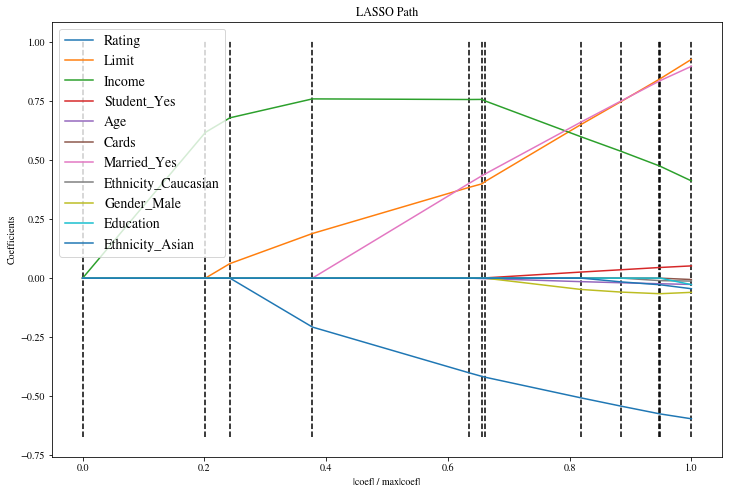

前四个进入模型的自变量： ['Rating' 'Limit' 'Income' 'Student_Yes']


In [16]:
'''
还可以使用sklearn的linear_model.lars_path()函数绘制正则化路径，详细可参加如下网址：
https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html
但是测试结果貌似和前面代码实现正则化路大致相同。
'''

import matplotlib.pyplot as plt
from sklearn import linear_model
X3=np.array(X2)
Y3=np.array(Y2)
_, n3, coefs = linear_model.lars_path(X3, Y3, method='lasso',verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.figure(figsize=[12,8])
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(np.array(predictors)[n3],fontsize=14)
plt.show()
print('前四个进入模型的自变量：',np.array(predictors)[n3[0:4]])